In [ ]:
!pip install -q tensorflow_text
!pip install -q simpleneighbors[annoy]
!pip install -q nltk
!pip install -q tqdm
!pip3 install tensorflow_text>=2.0.0rc
!pip install sentence_transformers
!pip install torch torchvision

In [19]:
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text
import seaborn as sn
from matplotlib import pyplot as plt
from sentence_transformers import SentenceTransformer

In [3]:
data = pd.read_csv('SICK_data.csv')

 Universal sentence encoder

In [4]:
module = hub.load('https://tfhub.dev/google/universal-sentence-encoder-qa/3')  


In [5]:
data.head()

,sentence_A,sentence_B,relatedness_score
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,-0.75
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,-0.10
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,-0.85
3,The young boys are playing outdoors and the ma...,There is no boy playing outdoors and there is ...,-0.30
4,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,-0.20


In [6]:
question_encoding = module.signatures['question_encoder'](
    tf.constant(data.sentence_A)
)
response_encoding = module.signatures['response_encoder'](
    input = tf.constant(data.sentence_B),
    context = tf.constant(data.sentence_B)
)

In [7]:
result = tf.keras.losses.cosine_similarity(response_encoding['outputs'], question_encoding['outputs'])

In [36]:
original_data = data.relatedness_score.iloc[:300]
model_data = result.numpy()[:300]
testing_index = list(range(300))

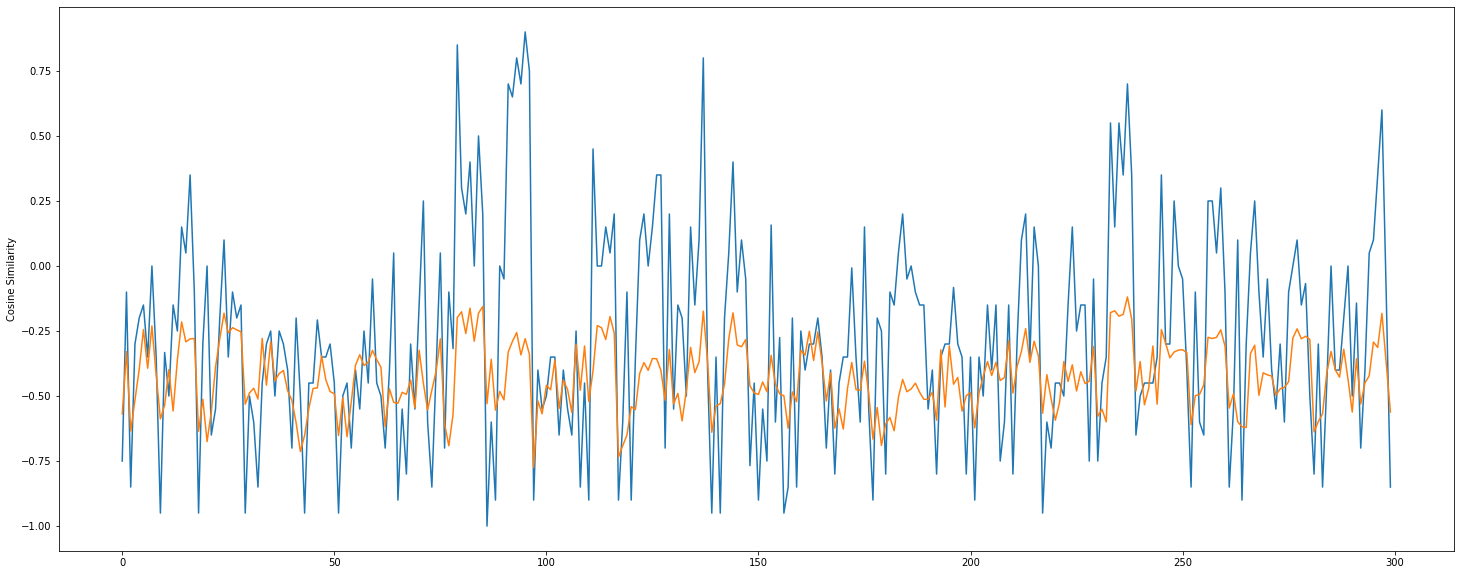

In [38]:
fig, ax = plt.subplots(figsize=(25,10))
sn.lineplot(x=testing_index,y=original_data)
sn.lineplot(x=testing_index,y=model_data)
ax.set_ylabel("Cosine Similarity")
plt.show()

**BERT based model**

In [21]:
model = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')
first_encoding = model.encode(data.sentence_A)
second_encoding = model.encode(data.sentence_B)

In [25]:
cosine_similarity_bert = tf.keras.losses.cosine_similarity(first_encoding, second_encoding)

In [28]:
cosine_similarity_bert.shape

TensorShape([9840])

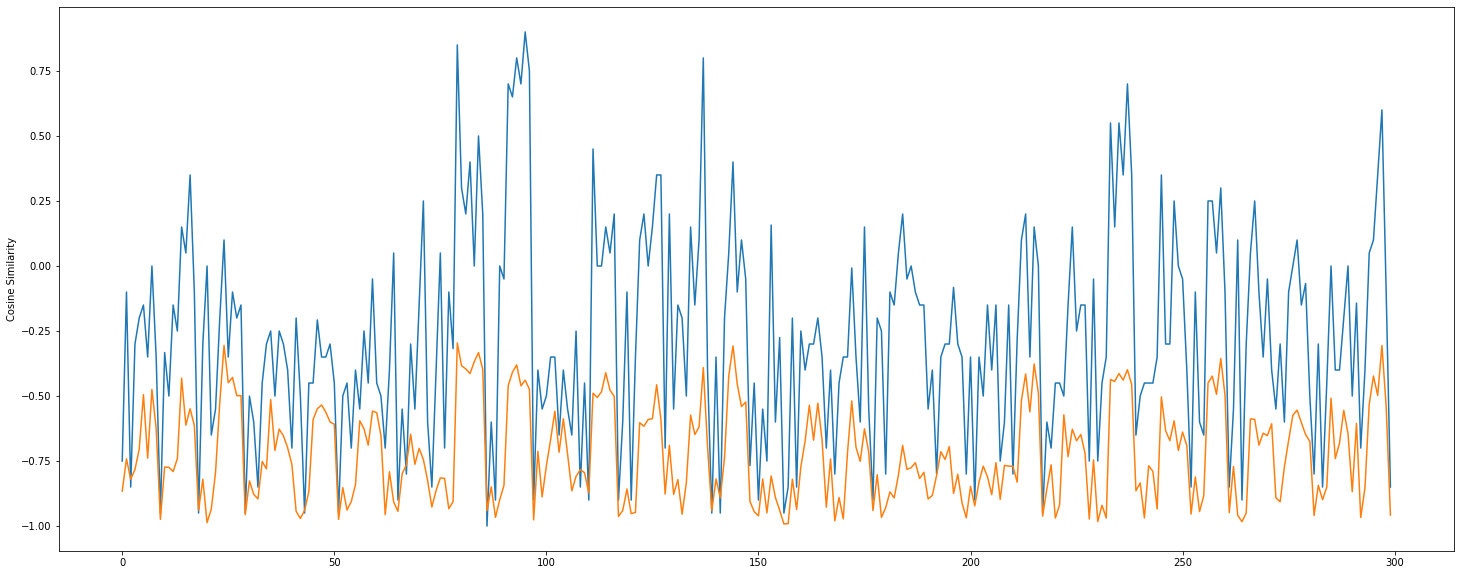

In [35]:
original_data = data.relatedness_score.iloc[:300]
model_data = cosine_similarity_bert.numpy()[:300]
testing_index = list(range(300))

fig, ax = plt.subplots(figsize=(25,10))
sn.lineplot(x=testing_index,y=original_data)
sn.lineplot(x=testing_index,y=model_data)
ax.set_ylabel("Cosine Similarity")
plt.show()